In [1]:
library("Matrix")
library("metacell")
library("anndata")
library('data.table')
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
setwd(here::here())

In [3]:
getwd()

[1] "/net/mraid14/export/tgdata/users/markusm/exe-gastrulation"

In [4]:
scdb_init("scrna_db_mm10_star/",force_reinit = T)

initializing scdb to scrna_db_mm10_star/



In [5]:
# Import MC2 output into a fake mc object and save it (I'm also replacing the egc with the fractions)
mc_2 = anndata::read_h5ad('mc2/embexe_bmp4_og2_projected.h5ad')
mc_2_cells = anndata::read_h5ad('mc2/clean_embexe_bmp4_og2.h5ad')

In [6]:
new_mc_id = "embexe_bmp4_og2_star"

In [7]:
mat = scdb_mat("embexe_bmp4_og2_stelzer_star")

In [8]:
ignore_cells = setdiff(mat@cells,mc_2_cells$obs_names)
length(ignore_cells)
length(mat@cells)
nrow(mc_2_cells$obs)
length(mat@cells) - length(ignore_cells)

[1] 0

[1] 94748

[1] 94757

[1] 94748

In [8]:
#mat = scm_ignore_cells(scmat = mat,ig_cells = union(mat@ignore_cells,ignore_cells))

In [9]:
f = mc_2_cells$obs_names %in% mat@cells
cells_all = mc_2_cells$obs_names[f]

In [10]:
sort(table(mc_2_cells$obs$metacell[f]))


 530  544  576  578  590  805  814  818  906  991 1036 1037 1039 1059 1071 1107 
  12   12   12   12   12   12   12   12   12   12   12   12   12   12   12   12 
1559 1616 2171 2248 2375 2377 2387 2393 2524 2664 2681 2698 2827 3197 3364 3408 
  12   12   12   12   12   12   12   12   12   12   12   12   12   12   12   12 
3423  216  404  418  463  494  557  582  584  605  630  647  716  743  766  806 
  12   13   13   13   13   13   13   13   13   13   13   13   13   13   13   13 
 862  867  870  873  980  988  993  999 1001 1010 1014 1021 1027 1030 1041 1062 
  13   13   13   13   13   13   13   13   13   13   13   13   13   13   13   13 
1074 1076 1077 1085 1089 1093 1099 1102 1104 1105 1106 1108 1120 1234 1331 1436 
  13   13   13   13   13   13   13   13   13   13   13   13   13   13   13   13 
1502 1587 1596 1599 1609 1617 1710 1918 1972 2269 2346 2360 2378 2390 2391 2459 
  13   13   13   13   13   13   13   13   13   13   13   13   13   13   13   13 
2582 2598 2649 2656 2668 26

In [11]:
table(mc_2_cells$obs$metacell[f])


  -2   -1    0    1    2    3    4    5    6    7    8    9   10   11   12   13 
  22  680   16   28   47   45   29   30   21   36   23   26   54   41   25   53 
  14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29 
  25   29   28   32   61   28   21   26   44   25   32   33   57   21   40   59 
  30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45 
  25   39   29   54   20   22   52   37   20   43   30   30   23   32   23   38 
  46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61 
  34   28   25   23   44   33   38   34   29   79   34   29   44   42   21   30 
  62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77 
  24   33   22   30   57   28   46   31   25   33   27   30   24   50   24   25 
  78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93 
  37   31   36   36   23   29   20   28   27   24   30   16   24   53   30   30 
  94   95   96   97   98   

In [12]:
outlier_cells = mc_2_cells$obs_names[ mc_2_cells$obs$metacell %in% c(-1,-2)]
outlier_cells = intersect(outlier_cells, cells_all)

In [13]:
cell_to_mc = mc_2_cells$obs$metacell
names(cell_to_mc) = mc_2_cells$obs_names
cell_to_mc = cell_to_mc[cells_all]
sum(is.na(cell_to_mc))
min(cell_to_mc)

[1] 0

[1] -2

In [14]:
included_cells = mc_2_cells$obs_names[ !(mc_2_cells$obs$metacell %in% c(-1,-2))]
included_cells = intersect(cells_all,included_cells)

In [15]:
min(cell_to_mc[ included_cells])
max(cell_to_mc[ included_cells])
length(unique(cell_to_mc[included_cells]))

[1] 0

[1] 4025

[1] 4026

In [16]:
old_to_new_mc_id = c(1:length(sort(unique(cell_to_mc[included_cells]))))
length(old_to_new_mc_id)
names(old_to_new_mc_id) = sort(unique(cell_to_mc[included_cells]))

[1] 4026

In [17]:
cell_to_mc_new = old_to_new_mc_id[as.character(cell_to_mc[included_cells])]
names(cell_to_mc_new) = included_cells

In [18]:
sum(is.na(cell_to_mc_new))
min(cell_to_mc_new)
max(cell_to_mc_new)
length(table(cell_to_mc_new))

[1] 0

[1] 1

[1] 4026

[1] 4026

In [19]:
outlier_cells = intersect(mat@cells,outlier_cells)

In [20]:
length(outlier_cells) + length(cell_to_mc_new)
length(mat@cells)

[1] 94748

[1] 94748

In [21]:
mcell_new_mc(mc_id = new_mc_id,mc = cell_to_mc_new,outliers = outlier_cells,scmat = mat)

add batch counts

compute footprints

compute absolute ps

compute coverage ps



In [22]:
min(colSums(mat@mat))
max(colSums(mat@mat))

[1] 1500

[1] 19994

In [22]:
#scdb_add_mat(id = "embexe_bmp4_og2_stelzer_star",mat = mat)

#### Transfer color from mm_atlas to mc.bmp4_ko

In [23]:
cell_type_key = fread(file = "/net/mraid14/export/tgdata/db/tgdb/tanaywiz/apps/mm_gastru/atlas2022.04/project/cache/embexe2_star/cell_type_colors.tsv",sep = '\t')

ct_to_col = cell_type_key$color
names(ct_to_col) = cell_type_key$cell_type


In [24]:
mc_color = ct_to_col[ as.character(mc_2$obs$projected_type)]
mc_color = ifelse(is.na(mc_color),"gray80",mc_color)

In [25]:
mc = scdb_mc(new_mc_id)
mc@colors = mc_color
mc@color_key = rename(cell_type_key,group = cell_type)

In [26]:
annotation_new = read.table('data/mcview/cell_type_annotation_embexe_bmp4_og2.tsv',sep = '\t',h = T)
cell_type_key[!(cell_type_key$color %in% annotation_new$color),]
annotation_new[ !(annotation_new$color %in% cell_type_key$color),]
annotation_new$color[30] = '#C9A997'
annotation_new[ !(annotation_new$color %in% cell_type_key$color),]

cell_type,color,order
<chr>,<chr>,<int>
Neural plate boundary,#879E86,27
Blood progenitors,#C9A997,44


,cell_type,color
,<chr>,<chr>
30,Blood progenitors,#c9a997


cell_type,color
<chr>,<chr>


In [27]:
annotation_new2 = annotation_new
rownames(annotation_new2) = 1:nrow(annotation_new2)

annotation_new2 = rbind(annotation_new2[1:6,],c("Neural plate boundary","#879E86"),annotation_new2[7:50,])
mc@color_key = rename(annotation_new2,group = cell_type)

In [28]:
scdb_add_mc(id = new_mc_id,mc = mc)

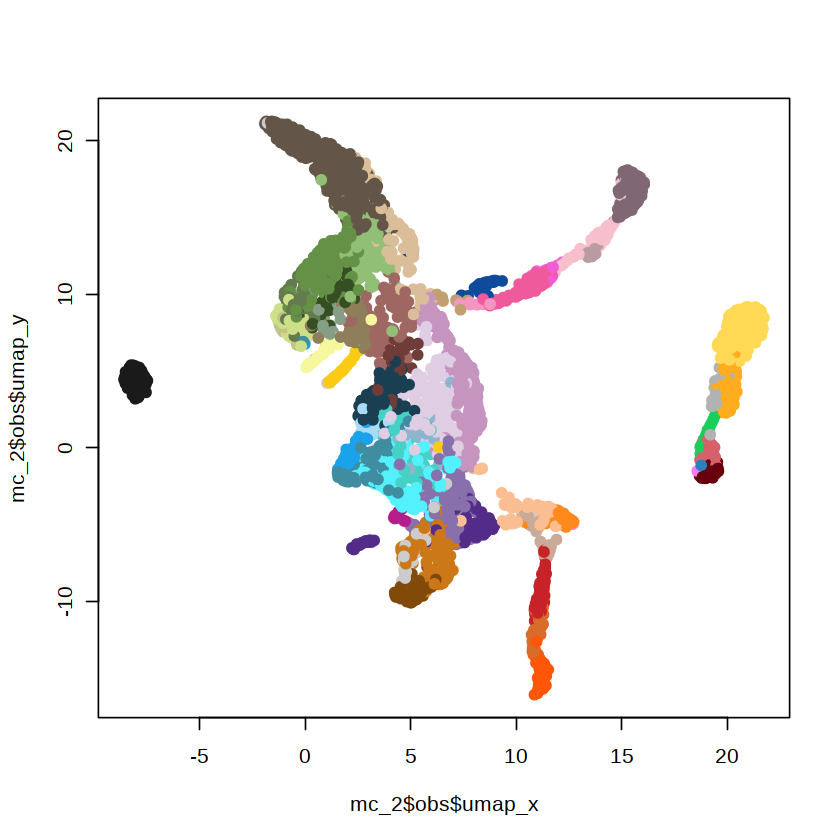

In [29]:
plot(mc_2$obs$umap_x,mc_2$obs$umap_y,pch = 19,cex = 1,col = mc_color)

#### Create preliminary 2d projection

In [41]:
#mcell_add_gene_stat(mat_id = "embexe_kdr", "embexe_kdr")

Calculating gene statistics... 

will downsamp

done downsamp

will gen mat_n

done gen mat_n

done computing basic gstat, will compute trends



..done


In [43]:
#Knn = 100
#mat_nm = "embexe_kdr"
#mcell_add_cgraph_from_mat_bknn(mat_id=mat_nm,gset_id = "embexe", graph_id=mat_nm,K=Knn,dsamp=T)

will downsample the matrix, N= 2899

will build balanced knn graph on 78353 cells and 1385 genes, this can be a bit heavy for >20,000 cells

sim graph is missing 23 nodes, out of 78353



In [48]:
#tgconfig::override_params(config_file = "config/emb_exe.yaml",package = "metacell")
#mcell_mc2d_force_knn(mc2d_id = "embexe_kdr_umap",mc_id = "embexe_kdr",graph_id = "embexe_kdr",feats_gset = "embexe")

got 1385 feat genes for mc graph construction

comp mc graph using the graph embexe_kdr and K 25

Missing coordinates in some cells that are not ourliers or ignored - check this out! (total 1156 cells are missing, maybe you used the wrong graph object? first nodes 181209_P01.181209_P01029181209_P01.181209_P01046181209_P01.181209_P01084181209_P01.181209_P01089181209_P01.181209_P01095181209_P01.181209_P01115181209_P01.181209_P01247181209_P01.181209_P01277181209_P01.181209_P01282181209_P03.181209_P03120



In [46]:
#scfigs_init('figs')

In [49]:
#mcell_mc2d_plot("embexe_kdr_umap")

png 
  2